## 1. 데이터 준비 및 확인

In [1]:
import pandas as pd

# 데이터 불러오기
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## 2. 데이터로더 구성

In [2]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=20000):
    train_data.drop_duplicates(subset=['document'], inplace=True) #train data의 'documnet'열에서 중복 데이터 제거
    train_data = train_data.dropna(how = 'any') #하나라도 결측치가 있는 행 제거
    test_data.drop_duplicates(subset=['document'], inplace=True)#test data도 동일하겍 진행
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X) #토큰화 , 불용어 제거 된 데이터를 X_trarin에 담기

    X_test = []    #test set도 동일하게 진행
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist() #하나의 배열로 합친후 list화
    counter = Counter(words) #word list를 받아서 word별 수를 딕셔너리로 return
    counter = counter.most_common(20000-4) #word중에서 빈도수가 높은수서대로 20000-4개 반환
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)} #word:index 형식으로 단어사전 구축
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist] #텍스트를 인덱스로
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [3]:
X_train[:5] #토큰화와 숫자인덱싱이 잘됐는지 5개만 확인

[[32, 74, 919, 4, 4, 39, 228, 20, 33, 748],
 [1028, 4, 11, 519, 549, 687, 5, 120, 4, 70, 1639, 52, 925, 1006, 15, 44, 391],
 [24, 205, 3],
 [8409, 158, 3925, 4, 4, 298, 94, 17, 6, 4, 4, 58, 3479],
 [3,
  8894,
  1108,
  52,
  2832,
  60,
  5,
  14,
  2758,
  41,
  1188,
  35,
  351,
  42,
  22,
  40,
  60,
  16052,
  3,
  427,
  3102,
  1766,
  6]]

In [4]:
index_to_word = {index:word for word, index in word_to_index.items()}
index_to_word

{3: '',
 4: '.',
 5: '영화',
 6: '다',
 7: '고',
 8: '하',
 9: '을',
 10: '보',
 11: '..',
 12: '게',
 13: ',',
 14: '!',
 15: '지',
 16: '있',
 17: '없',
 18: '?',
 19: '좋',
 20: '나',
 21: '었',
 22: '만',
 23: '는데',
 24: '너무',
 25: '봤',
 26: '적',
 27: '안',
 28: '정말',
 29: '로',
 30: '음',
 31: '것',
 32: '아',
 33: '네요',
 34: '재밌',
 35: '어',
 36: '같',
 37: '점',
 38: '지만',
 39: '진짜',
 40: '했',
 41: '에서',
 42: '기',
 43: '네',
 44: '않',
 45: '거',
 46: '았',
 47: '수',
 48: '되',
 49: '면',
 50: 'ㅋㅋ',
 51: '말',
 52: '연기',
 53: '인',
 54: '주',
 55: '내',
 56: '최고',
 57: '~',
 58: '평점',
 59: '이런',
 60: '던',
 61: '어요',
 62: '할',
 63: '왜',
 64: '겠',
 65: '1',
 66: '스토리',
 67: '해',
 68: '습니다',
 69: 'ㅋㅋㅋ',
 70: '...',
 71: '드라마',
 72: '생각',
 73: '아니',
 74: '더',
 75: '그',
 76: '싶',
 77: '사람',
 78: '듯',
 79: '때',
 80: '감동',
 81: '함',
 82: '배우',
 83: '본',
 84: '까지',
 85: '뭐',
 86: '알',
 87: '만들',
 88: '내용',
 89: '볼',
 90: '감독',
 91: '보다',
 92: '라',
 93: '그냥',
 94: '재미',
 95: '시간',
 96: '지루',
 97: '중',
 98: '재미있',
 99: '

## 3. 모델 구성을 위한 데이터 가공

토큰 수 평균 :  15.98170773419436
토큰 수 최대 :  116
토큰 수 표준편차:  12.82473766384545


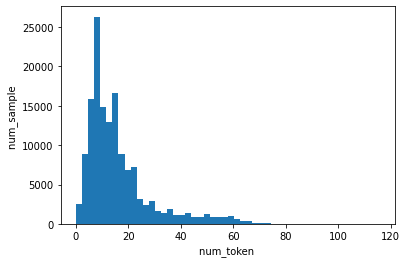

In [5]:
import matplotlib.pyplot as plt

num_token= [len(tokens) for tokens in X_train]
num_token = np.array(num_token)

print('토큰 수 평균 : ', np.mean(num_token))
print('토큰 수 최대 : ', np.max(num_token))
print('토큰 수 표준편차: ',np.std(num_token))
plt.hist([len(token) for token in X_train], bins=50)
plt.xlabel('num_token ')
plt.ylabel('num_sample ')
plt.show()

In [6]:
max_token = np.mean(num_token) + 2 * np.std(num_token)
maxlen = int(max_token)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_token < max_token) / len(num_token)))

pad_sequences maxlen :  41
전체 문장의 0.9341711017772366%가 maxlen 설정값 이내에 포함됩니다. 


**maxlen을 41로 설정했을시, 93.4%가 설정값 이내에 포함된다. 41이 적당한 수치로 보여지니, maxlen을 41로 설정하고 진행해보자.**

In [8]:
import tensorflow as tf
#41보다 짧은 문장에 padding
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index[''],
                                                        padding='pre',
                                                        maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index[''],
                                                       padding='pre', 
                                                       maxlen=maxlen)



## 4. 모델 구성 및 validation set 구성

In [9]:
import tensorflow as tf
#LSTM 레이어 사용
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 20000 #사용할 단어사전 크기
embedding_dim = 100 #임베딩레이어 차원 수 


model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
model.add(tf.keras.layers.LSTM(128)) #hidden 노드 128개
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #이진 분류문제의 활성화함수 



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,117,377
Trainable params: 2,117,377
Non-trainable params: 0
_________________________________________________________________


In [10]:
len(X_train) #train set 개수 확인

146182

In [11]:
# validation set 20% 분리
num_val = int(len(X_train)*0.2)
X_val = X_train[:num_val]   
y_val = y_train[:num_val]

# validation set을 제외한 나머지 80%
partial_X_train = X_train[num_val:]  
partial_y_train = y_train[num_val:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(116946, 41)
(116946,)


## 5. 모델 훈련 개시

In [12]:
# 모델 학습
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) #과적합 방지를 위한 조기종료 


history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    callbacks=earlystopping,
                    validation_data=(X_val, y_val))

Epoch 1/20
229/229 [==============================] - 6s 13ms/step - loss: 0.4277 - accuracy: 0.8032 - val_loss: 0.3456 - val_accuracy: 0.8492
Epoch 2/20
229/229 [==============================] - 3s 12ms/step - loss: 0.3107 - accuracy: 0.8685 - val_loss: 0.3333 - val_accuracy: 0.8559
Epoch 3/20
229/229 [==============================] - 3s 12ms/step - loss: 0.2701 - accuracy: 0.8883 - val_loss: 0.3351 - val_accuracy: 0.8577
Epoch 4/20
229/229 [==============================] - 3s 12ms/step - loss: 0.2353 - accuracy: 0.9051 - val_loss: 0.3495 - val_accuracy: 0.8572
Epoch 5/20
229/229 [==============================] - 3s 12ms/step - loss: 0.2030 - accuracy: 0.9203 - val_loss: 0.3616 - val_accuracy: 0.8539
Epoch 6/20
229/229 [==============================] - 3s 12ms/step - loss: 0.1750 - accuracy: 0.9326 - val_loss: 0.3842 - val_accuracy: 0.8540
Epoch 7/20
229/229 [==============================] - 3s 12ms/step - loss: 0.1498 - accuracy: 0.9434 - val_loss: 0.4386 - val_accuracy: 0.8474

## 6. Loss, Accuracy 그래프 시각화

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


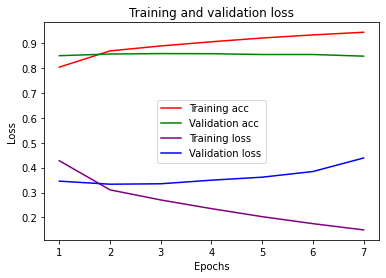

In [13]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
# b는 "파란 실선"입니다

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
# test set에 모델을 적용해보면?
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.4464 - accuracy: 0.8437
[0.44639384746551514, 0.8436641693115234]


In [15]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(20000, 100)


In [16]:
import os
# 학습한 Embedding 파라미터를 파일에 써서 저장
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, embedding_dim))  

# 워드 벡터를 파일에 기록 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [17]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['영화'] #단어 '영화'를 벡터로 나타내면?
vector

array([-2.76158825e-02,  5.01513155e-03,  2.09718314e-03,  1.11810848e-01,
       -4.27749045e-02, -3.43834534e-02, -5.67966141e-02, -2.88132038e-02,
       -9.05973744e-03,  3.04030515e-02,  4.29086909e-02,  4.13169060e-03,
        8.99582580e-02, -6.80670440e-02, -8.49800631e-02,  4.13160585e-02,
        7.58195072e-02, -6.47855401e-02,  8.96119606e-03, -1.15826754e-02,
        1.52552808e-02, -2.40067486e-02,  5.98862357e-02, -3.76223922e-02,
       -5.80455102e-02,  7.80930370e-02, -2.05488857e-02,  8.51245224e-03,
       -4.60099615e-02,  5.07979803e-02, -1.71267129e-02, -2.40677912e-02,
       -4.00967635e-02,  2.91202683e-02,  3.59269083e-02,  1.52072068e-02,
       -3.59497592e-02, -6.20858520e-02,  7.71585805e-03, -3.92539203e-02,
       -2.99974382e-02, -5.23143373e-02,  2.47950703e-02,  3.24862562e-02,
       -1.72665194e-02,  2.89451201e-02, -1.72324590e-02, -2.18455605e-02,
        2.65546497e-02,  1.00799846e-02,  1.85896549e-02, -7.96340499e-03,
        6.67503988e-03,  

In [18]:
word_vectors.similar_by_word('영화') #영화와 비슷한 단어를 출력해보자

[('~~', 0.5038129091262817),
 ('스럽', 0.4623877704143524),
 ('점', 0.4518834352493286),
 ('열연', 0.45159417390823364),
 ('!!~', 0.43951624631881714),
 ('ㅣ', 0.43903428316116333),
 ('ㅇㅇㅇㅇ', 0.43430379033088684),
 ('던짐', 0.43275129795074463),
 ('.^^', 0.43099892139434814),
 ('@@', 0.42676782608032227)]

출력 결과는 영화와 거의 관련이 없는 단어들이 출력됐다. 기존의 한국어 임베딩 레이어를 사용해보자.

## 8. 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [20]:
import gensim
ko_path = os.getenv('HOME')+'/aiffel/exploration/ko/ko.bin'
ko_model = gensim.models.Word2Vec.load(ko_path)

In [21]:
ko_model.similar_by_word('영화') #영화와 비슷한 단어 출력

/tmp/ipykernel_620/2743228776.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  ko_model.similar_by_word('영화') #영화와 비슷한 단어 출력


[('다큐멘터리', 0.7265259027481079),
 ('영화사', 0.715214192867279),
 ('드라마', 0.705294132232666),
 ('뮤지컬', 0.6947016716003418),
 ('코미디', 0.69093257188797),
 ('영화인', 0.6702202558517456),
 ('서부극', 0.6571458578109741),
 ('스릴러', 0.6533164978027344),
 ('로맨스', 0.6428799629211426),
 ('애니메이션', 0.6425570249557495)]

이전의 우리가 학습한 word2vec 보다 훨씬 비슷한 단어가 출력됐다. 이제, 이전의 영화리뷰를 ko_model로 학습시켜보자.

In [41]:
vocab_size = 20000 #사용할 단어사전 크기
embedding_dim = 200 #임베딩레이어 차원 수 (ko_model의 dim=200)
embedding_matrix = np.random.rand(vocab_size, embedding_dim)
# embedding_matrix에 ko_model의 벡터를 단어 하나씩마다 카피

for i in range(4,vocab_size):
    if index_to_word[i] in ko_model:
        embedding_matrix[i] = ko_model[index_to_word[i]]


/tmp/ipykernel_620/730000061.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in ko_model:
/tmp/ipykernel_620/730000061.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = ko_model[index_to_word[i]]


In [42]:
#모델 학습
from tensorflow.keras.initializers import Constant



# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 embedding_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.LSTM(128)) #이전 모델과의 비교를 위해 같은 LSTM layer와 같은 노드 수를 적용
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #이진 분류문제의 활성화함수 
model.summary() 



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 41, 200)           4000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 4,168,577
Trainable params: 4,168,577
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 모델 학습
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) #과적합 방지를 위한 조기종료 


history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    callbacks=earlystopping,
                    validation_data=(X_val, y_val))

Epoch 1/20
229/229 [==============================] - 5s 17ms/step - loss: 0.4486 - accuracy: 0.7853 - val_loss: 0.3575 - val_accuracy: 0.8428
Epoch 2/20
229/229 [==============================] - 3s 15ms/step - loss: 0.3199 - accuracy: 0.8636 - val_loss: 0.3251 - val_accuracy: 0.8583
Epoch 3/20
229/229 [==============================] - 3s 15ms/step - loss: 0.2704 - accuracy: 0.8886 - val_loss: 0.3244 - val_accuracy: 0.8641
Epoch 4/20
229/229 [==============================] - 3s 15ms/step - loss: 0.2359 - accuracy: 0.9049 - val_loss: 0.3298 - val_accuracy: 0.8613
Epoch 5/20
229/229 [==============================] - 4s 15ms/step - loss: 0.2060 - accuracy: 0.9186 - val_loss: 0.3423 - val_accuracy: 0.8615
Epoch 6/20
229/229 [==============================] - 4s 15ms/step - loss: 0.1766 - accuracy: 0.9324 - val_loss: 0.3662 - val_accuracy: 0.8599
Epoch 7/20
229/229 [==============================] - 4s 15ms/step - loss: 0.1481 - accuracy: 0.9438 - val_loss: 0.4101 - val_accuracy: 0.8576

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


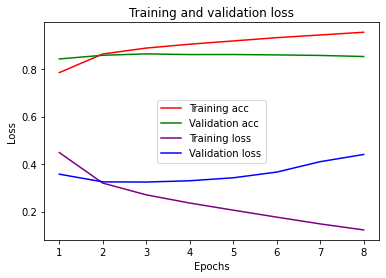

In [44]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
# b는 "파란 실선"입니다

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [45]:
# test set에 모델을 적용
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.4384 - accuracy: 0.8533
[0.43837130069732666, 0.8533474206924438]


## 회고

이번 노드는 NLP의 한 카테고리인 감성분석을 진행하는 노드였다.
숫자로 표현하기가 용이한 CV와 달리 NLP는 텍스트를 숫자로 변환하는 과정이 너무 이해가 안가서 NLP는 진짜 어렵다라고만 생각했었는데, 코드를 한줄한줄 살펴보고, NLP와 관련된 책을 함께 보면서 노드를 진행하니 한결 수월했던것 같다.
이번 노드를 진행할때 NLP의 전체적인 프레임워크가 이해가 잘 안가서 특히 어려웠던것 같다. 또한 이번 노드에서는 tokenizer를 이용하여 굉장히 간단하게 했던것 같은데, 이번에는 일일이 코드로 작성돼 있어서 그 과정이 굉장히 헷갈렸다.
마지막으로 실습 데이터에서는 이미 구현되어있는 load_data함수를 왜 구현해야 하는지부터가 이해가 잘 안돼서 코드를 이해하는데 최대한 집중하면서 진행했던것 같다.
NLP는 공부하면 할수록 더욱 재밌고, 또 어려운것 같다. 한국어를 형태소를 바꿔서 일일이 나누고, 그걸 또 숫자로 나누는데 딥러닝 알고리즘이 긍정인지 분류인지 예측할 수 있다는 사실이 굉장히 신기한것 같다. 고잉딥퍼 풀잎스쿨을 NLP로 결정한만큼, NLP에 대해서 더욱 깊게 공부해보고싶다.
 